In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
load_dotenv("password.env")
username_password = os.environ.get('username_password')
engine = create_engine(f'postgresql://{username_password}@localhost:5432/Employee_database')
connection = engine.connect()

In [4]:
salaries_df = pd.read_sql('SELECT * FROM "Salaries"', engine)
employees_df = pd.read_sql('SELECT * FROM "Employees"', engine)
titles_df = pd.read_sql('SELECT * FROM "Titles"', engine)
employees_df = employees_df.rename(columns = ({"emp_title_id" : "title_id"}))
display(salaries_df.head())
display(employees_df.head())
display(titles_df.head())

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
merged_df = pd.merge(salaries_df, employees_df, on = "emp_no")
complete_merged_df = pd.merge(merged_df, titles_df, on = "title_id")
filtered_df = complete_merged_df[["salary", "title"]]
grouped_df = filtered_df.groupby(["title"])
avg_salary_df = grouped_df.mean()
avg_salary_df = avg_salary_df["salary"].sort_values(ascending = False)

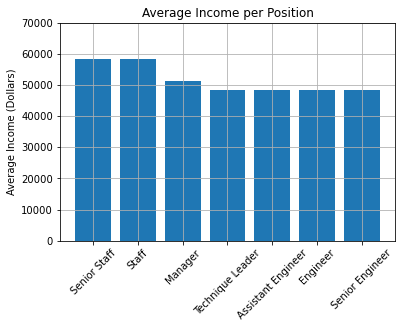

In [8]:
plt.bar(x = avg_salary_df.index, height = avg_salary_df)
plt.ylabel("Average Income (Dollars)")
plt.title("Average Income per Position")
plt.grid(True)
plt.ylim(0,70000)
plt.xticks(rotation = 45)
plt.show()

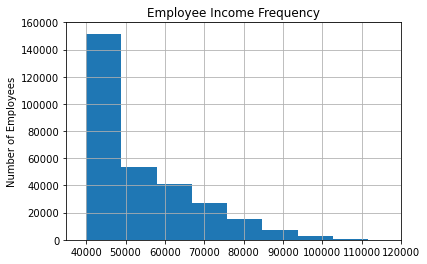

In [9]:
plt.hist(salaries_df["salary"])
plt.grid(True)
plt.ylabel("Number of Employees")
plt.title("Employee Income Frequency")
plt.xlim(35000,120000)
plt.ylim(0,160000)
plt.show()